# 工作流程
* 載入需要的套件
* 從COCO的驗證資料集中找一張範例照片，並且網上下載，顯示照片
* 進行物件偵測，做方框標記
* 列出偵測出來的類別代碼，以及方框座標
* 列出代碼對應的物件
* 顯示辨識出來的圖形
* 展示骨骼標記
* 展示全景分割

In [1]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.6.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
     |████████████████████████████████| 6.6MB 4.7MB/s 
     |████████████████████████████████| 2.2MB 13.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201030-cp36-none-any.whl size=44294 sha256=ed748a8391642e951ce9b7fd565d728974f55feb9bcb9b5c36f6fa29263d59e5
  Stored in directory: /root/.cache/pip/wheels/7f/7a/c8/521a7c1d1974bf1c536fed7cb258e3be173730d71065407bab
Successfully built fvcore
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [3]:
import detectron2
import cv2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from matplotlib import pyplot as plt

--2020-11-02 06:32:41--  https://i2.kknews.cc/SIG=7f21la/8o61000238qs8oq4sq77.jpg
Resolving i2.kknews.cc (i2.kknews.cc)... 104.22.27.227, 172.67.26.195, 104.22.26.227
Connecting to i2.kknews.cc (i2.kknews.cc)|104.22.27.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57502 (56K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  56.15K  --.-KB/s    in 0s      

2020-11-02 06:32:42 (115 MB/s) - ‘input.jpg’ saved [57502/57502]



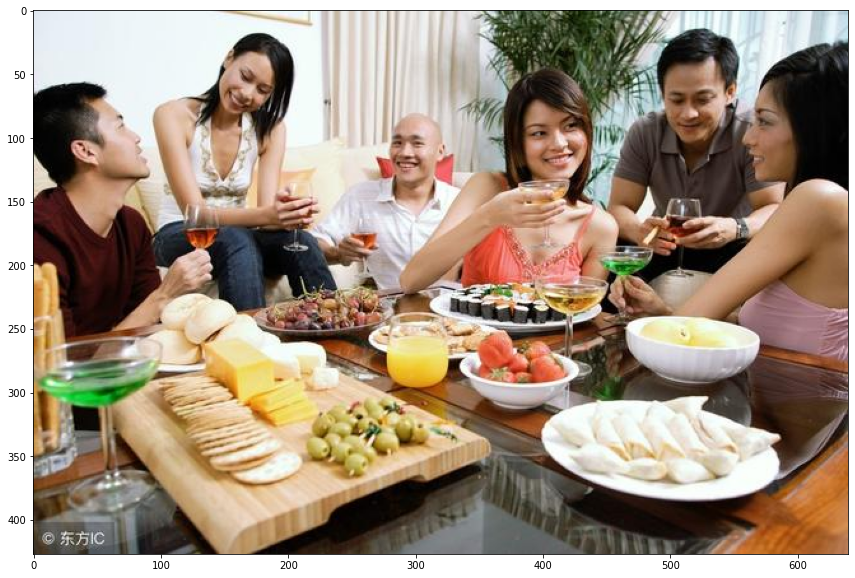

In [4]:
#!wget http://images.cocodataset.org/val2017/000000398742.jpg -O input.jpg
!wget https://i2.kknews.cc/SIG=7f21la/8o61000238qs8oq4sq77.jpg -O input.jpg
im = cv2.imread("./input.jpg")
plt.figure(figsize=(20,10))
plt.imshow(im[:,:,::-1])

# 程式流程
* 宣告設定檔物件
* 取得設定檔，指定需要的模型種類
* 設定辨識值的門檻
* 下載模型
* 宣告偵測器，並且進行偵測
* 展示類別代碼及標記值
* 利用內建Visualizer將偵測出的圖形顯示出來

In [5]:
# Inference with a object detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

# If your detectron2's version is not the most updated, please use direct link as followed, to get the link , please visit 
# https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md

# cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl"

predictor = DefaultPredictor(cfg)
outputs = predictor(im)


model_final_280758.pkl: 167MB [00:02, 61.9MB/s]                           
/usr/local/lib/python3.6/dist-packages/detectron2/layers/wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  return x.nonzero().unbind(1)


In [6]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([40,  0, 45,  0,  0, 40, 40, 45,  0,  0, 40,  0,  0, 40, 40, 58, 60, 41,
        41, 40], device='cuda:0')
Boxes(tensor([[493.6031, 146.4347, 524.0006, 210.2768],
        [ 88.8334,  18.3103, 224.9574, 241.4077],
        [462.7050, 238.8138, 571.7520, 296.4148],
        [  0.0000,  55.8767, 128.9400, 258.5727],
        [289.4473,  46.9074, 466.2897, 220.2993],
        [192.2062, 125.4446, 221.1006, 188.8379],
        [  6.4780, 251.7360, 105.1924, 399.3741],
        [336.8517, 258.3825, 429.5562, 314.7841],
        [451.6959,  15.0692, 579.0148, 238.2866],
        [494.5857,  22.6869, 638.1877, 289.8981],
        [117.3656, 152.7700, 145.5299, 217.3930],
        [213.1215,  80.7290, 352.4867, 221.7405],
        [ 31.0122,  30.6966, 175.8336, 252.9005],
        [248.2963, 154.3899, 271.3593, 205.5160],
        [396.6432, 205.8826, 447.9720, 276.3604],
        [338.4467,   3.1575, 502.7935, 118.9828],
        [  4.5435, 186.3065, 640.0000, 416.8544],
        [  1.6389, 246.3996,  

In [7]:
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
preds

['wine glass',
 'person',
 'bowl',
 'person',
 'person',
 'wine glass',
 'wine glass',
 'bowl',
 'person',
 'person',
 'wine glass',
 'person',
 'person',
 'wine glass',
 'wine glass',
 'potted plant',
 'dining table',
 'cup',
 'cup',
 'wine glass']

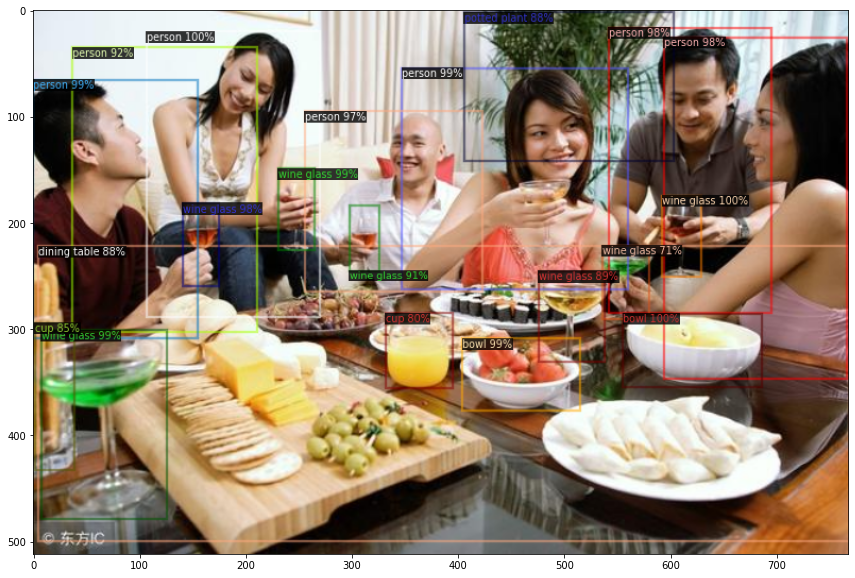

In [8]:
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_f10217.pkl: 178MB [00:03, 48.1MB/s]                           


['wine glass', 'person', 'bowl', 'person', 'person', 'wine glass', 'wine glass', 'bowl', 'person', 'person', 'wine glass', 'person', 'person', 'wine glass', 'wine glass', 'potted plant', 'dining table', 'cup', 'cup', 'wine glass']


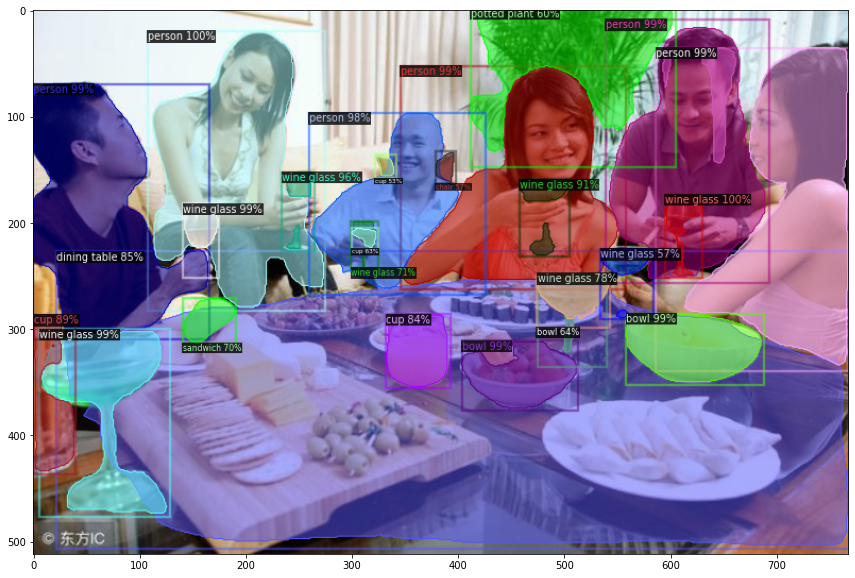

In [9]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = './model_final_f10217.pkl'
predictor = DefaultPredictor(cfg)
all_things = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes
preds = [all_things[x] for x in outputs["instances"].pred_classes]
print(preds)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_a6e10b.pkl: 237MB [00:03, 59.4MB/s]                           


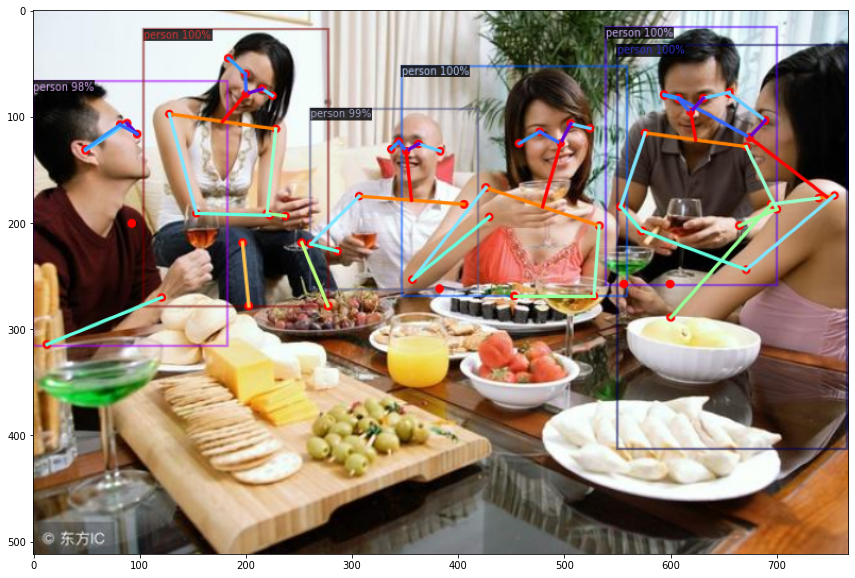

In [10]:
# Inference with a keypoint detection model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())

model_final_cafdb1.pkl: 261MB [00:02, 96.7MB/s]                           


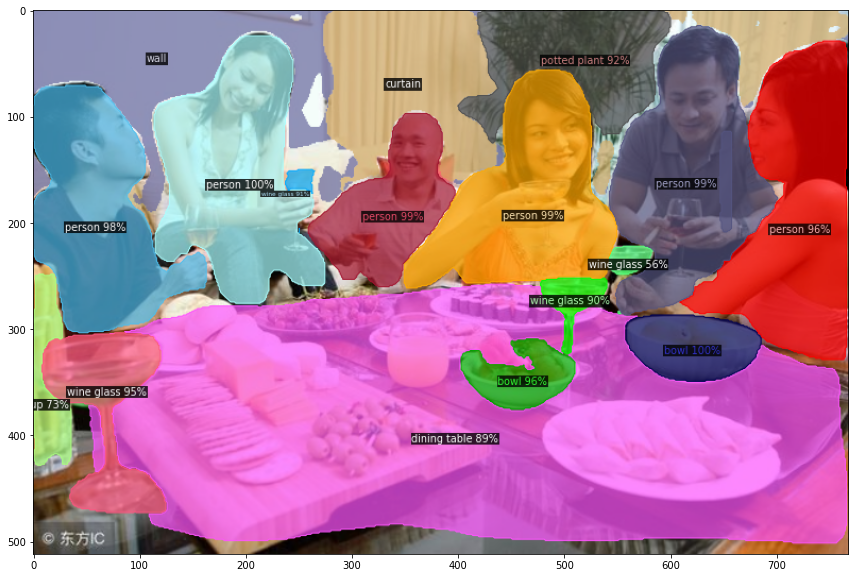

In [11]:
# Inference with a panoptic segmentation model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
plt.figure(figsize=(20,10))
plt.imshow(v.get_image())